# 10. Logistic Regression

## 10.2 Binary logistic regression

### 10.2.7 MAP estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_predictions(ax, xx, yy, transformer, model):
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid2 = transformer.transform(grid)[:, 1:]
    Z = model.predict(grid2).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5)

def plot_data(ax, X, y, is_train=True):
    X0 = X[:, 0]
    X1 = X[:, 1]
    markers = ['b*', 'rx'] if is_train else ['bs', 'ro']
    ax.plot(X[y == 0, 0], X[y == 0, 1], markers[0], label="Class {0}")
    ax.plot(X[y == 1, 0], X[y == 1, 1], markers[1], label="Class {1}")
    ax.set_ylim(-2.75, 2.75)
    ax.legend(loc='upper right')
    ax.set_xlabel('$x_{0}$')
    ax.set_ylabel('$x_{1}$')

n_train, n_test = 50, 1000
n_samples = n_train + n_test

from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=n_samples, n_features=2, n_redundant=0, n_classes=2,
    n_clusters_per_class=2, class_sep=0.1, random_state=1
)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=n_train, test_size=n_test, shuffle=False
)

n_grid = 200
xmin, ymin = X.min(axis=0)
xmax, ymax = X.max(axis=0)
xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, n_samples), np.linspace(ymin, ymax, n_grid)
)
xx.shape, yy.shape

((200, 1050), (200, 1050))

In [3]:
# Generate a new feature matrix consisting of all polynomial combinations of
# the features with degree less than or equal to the specified degree.
# e.g., if an input sample is two dimensional and of the form [a, b],
# the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=4)
X_train_poly_feature = transformer.fit_transform(X_train)[:, 1:] # except for const
X_train.shape,  X_train_poly_feature.shape

((50, 2), (50, 14))

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=10) # regularization only
clf.fit(X_train_poly_feature, y_train)
clf.score(X_train_poly_feature, y_train)

0.8

### Figure 10.4: Polynomial feature expansion applied to a two-class, two-dimensional logistic regression problem. (a) Degree $K=1$. (b) Degree $K=2$. (c) Degree $K=4$. (d) Train and test error vs degree.

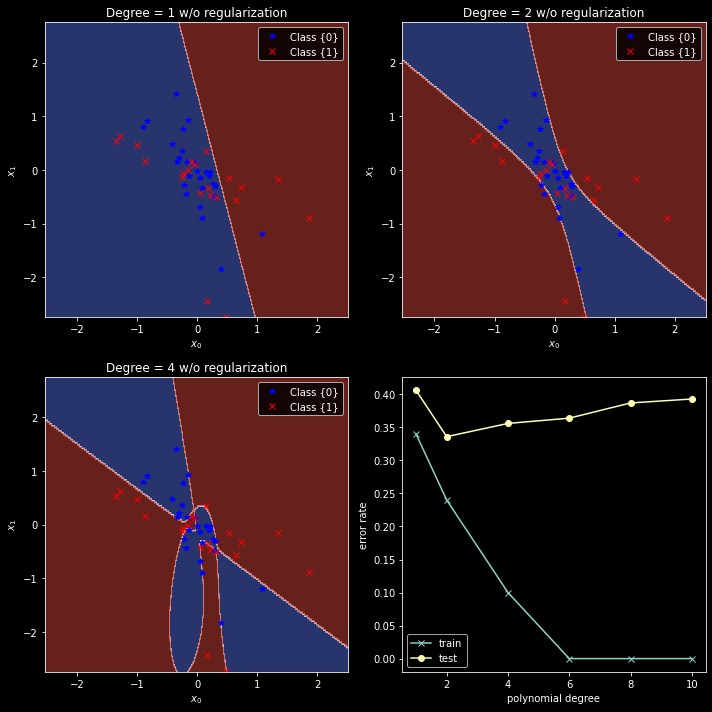

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = axes.ravel()

clf = LogisticRegression(penalty='none', max_iter=5000)

plot_list_K = [1, 2, 4]
for K, ax in zip(plot_list_K, axes[:3]):
    transformer = PolynomialFeatures(degree=K)
    X_train_poly_feature = transformer.fit_transform(X_train)[:, 1:] # except for const
    clf.fit(X_train_poly_feature, y_train)
    plot_predictions(ax, xx, yy, transformer, clf)
    plot_data(ax, X_train, y_train)
    ax.set_title(f"Degree = {K:d} w/o regularization")

plot_list_K = [1, 2, 4, 6, 8, 10]
plot_list_train_err = []
plot_list_test_err = []
for K in plot_list_K:
    transformer = PolynomialFeatures(degree=K)
    X_train_poly_feature = transformer.fit_transform(X_train)[:, 1:] # except for const
    X_test_poly_feature = transformer.fit_transform(X_test)[:, 1:] # except for const
    clf.fit(X_train_poly_feature, y_train)
    plot_list_train_err.append(1 - clf.score(X_train_poly_feature, y_train))
    plot_list_test_err.append(1 - clf.score(X_test_poly_feature, y_test))

axes[-1].plot(plot_list_K, plot_list_train_err, 'x-', label='train')
axes[-1].plot(plot_list_K, plot_list_test_err, 'o-', label='test')
axes[-1].set_xlabel('polynomial degree')
axes[-1].set_ylabel('error rate')
axes[-1].legend()
fig.tight_layout()

### Figure 10.6: Weight decay with variance $C$ applied to a two-class, two-dimensional logistic regression problem with a degree 4 polynomial. (a) $C=1$. (b) $C=316$. (c) $C=100,000$. (d) Train and test error vs $C$.

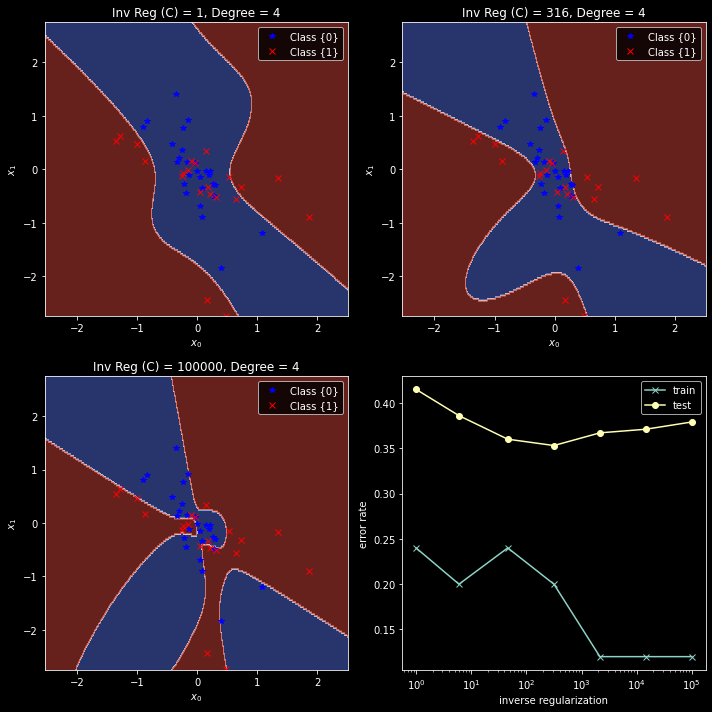

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = axes.ravel()

transformer = PolynomialFeatures(degree=4)
X_train_poly_feature = transformer.fit_transform(X_train)[:, 1:] # except for const
X_test_poly_feature = transformer.fit_transform(X_test)[:, 1:] # except for const

plot_list_C = [1, 316, 100000]
for C, ax in zip(plot_list_C, axes[:3]):
    clf = LogisticRegression(C=C, max_iter=1000)
    clf.fit(X_train_poly_feature, y_train)
    plot_predictions(ax, xx, yy, transformer, clf)
    plot_data(ax, X_train, y_train)
    ax.set_title(f"Inv Reg (C) = {C:d}, Degree = 4")

plot_list_C = np.logspace(0, 5, 7, dtype='int64')
plot_list_train_err = []
plot_list_test_err = []
for C in plot_list_C:
    clf = LogisticRegression(C=C, max_iter=1000)
    clf.fit(X_train_poly_feature, y_train)
    plot_list_train_err.append(1 - clf.score(X_train_poly_feature, y_train))
    plot_list_test_err.append(1 - clf.score(X_test_poly_feature, y_test))

axes[-1].plot(plot_list_C, plot_list_train_err, 'x-', label='train')
axes[-1].plot(plot_list_C, plot_list_test_err, 'o-', label='test')
axes[-1].set_xlabel('inverse regularization')
axes[-1].set_ylabel('error rate')
axes[-1].set_xscale('log')
axes[-1].legend()
fig.tight_layout()